#  M/M/c Queueing Model Function

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# M/M/c queueing model functions and analysis
def mmc(lambda_rate, mu, c):
    rho = lambda_rate / (c * mu)
    if rho >= 1:
        return None  # System is unstable (ρ ≥ 1)

    # Compute P0
    sum_terms = sum((lambda_rate / mu) ** n / math.factorial(n) for n in range(c))
    last_term = ((lambda_rate / mu) ** c) / (math.factorial(c) * (1 - rho))
    P0 = 1 / (sum_terms + last_term)

    # Probability of waiting (Erlang C)
    Pw = last_term * P0

    # Average number of customers in queue
    Lq = (Pw * rho) / (1 - rho) * (lambda_rate / mu)

    # Average waiting time in queue
    Wq = Lq / lambda_rate

    # Total time in system (waiting + service)
    W = Wq + (1 / mu)

    # Average number of customers in system
    L = lambda_rate*W

    return {
        "P0": P0,
        "P_wait": Pw,
        "Lq": Lq,
        "Wq": Wq,
        "W": W,
        "L": L,
        "rho": rho
    }


# Summary Table Function

In [27]:
# Function to create summary table
def mmc_summary(lambda_rate, mu, c_range, sla_Wq=2):
    results = []
    for c in c_range:
        res = mmc(lambda_rate, mu, c)
        if res:
            Wq_min = res["Wq"] * 60  # Convert to minutes
            results.append({
                "Servers (c)": c,
                "ρ": round(res["rho"], 3),
                "P(wait)": round(res["P_wait"], 3),
                "Lq (cust)": round(res["Lq"], 3),
                "Wq (min)": round(Wq_min, 2),
                "W (min)": round(res["W"] * 60, 2),
                "SLA Pass?": "True" if Wq_min <= sla_Wq else "False"
            })
    return pd.DataFrame(results)

# Ploting & SLA Line

In [28]:
# Function to create summary table with SLA check
def plot_mmc(lambda_rate, mu, c_range, sla_Wq=2):
    Wq_list = []
    Pw_list = []
    Lq_list = []

    for c in c_range:
        res = mmc(lambda_rate, mu, c)
        if res:
            Wq_list.append(res["Wq"] * 60)  # Convert to minutes
            Pw_list.append(res["P_wait"])
            Lq_list.append(res["Lq"])
        else:
            Wq_list.append(None)
            Pw_list.append(None)
            Lq_list.append(None)

    plt.figure(figsize=(12, 5))

    # Wq graph
    plt.subplot(1, 3, 1)
    plt.plot(c_range, Wq_list, marker='o', label="Wq")
    plt.axhline(y=sla_Wq, color='r', linestyle='--', label=f"SLA = {sla_Wq} min")
    plt.title("Average Waiting Time (Wq)")
    plt.xlabel("Number of Servers (c)")
    plt.ylabel("Minutes")
    plt.legend()

    # Pw graph
    plt.subplot(1, 3, 2)
    plt.plot(c_range, Pw_list, marker='o', color='orange')
    plt.title("Probability of Waiting (Pw)")
    plt.xlabel("Number of Servers (c)")
    plt.ylabel("Probability")

    # Lq graph
    plt.subplot(1, 3, 3)
    plt.plot(c_range, Lq_list, marker='o', color='green')
    plt.title("Average Queue Length (Lq)")
    plt.xlabel("Number of Servers (c)")
    plt.ylabel("Customers")

    plt.tight_layout()
    plt.show()

# Main & Parameter

    Servers (c)      ρ  P(wait)  Lq (cust)  Wq (min)  W (min) SLA Pass?
0             7  0.857    0.614     22.098     22.10    28.10     False
1             8  0.750    0.357      6.426      6.43    12.43     False
2             9  0.667    0.196      2.352      2.35     8.35     False
3            10  0.600    0.101      0.912      0.91     6.91      True
4            11  0.545    0.049      0.354      0.35     6.35      True
5            12  0.500    0.022      0.135      0.13     6.13      True
6            13  0.462    0.010      0.050      0.05     6.05      True
7            14  0.429    0.004      0.018      0.02     6.02      True
8            15  0.400    0.001      0.006      0.01     6.01      True
9            16  0.375    0.001      0.002      0.00     6.00      True
10           17  0.353    0.000      0.001      0.00     6.00      True
11           18  0.333    0.000      0.000      0.00     6.00      True
12           19  0.316    0.000      0.000      0.00     6.00   

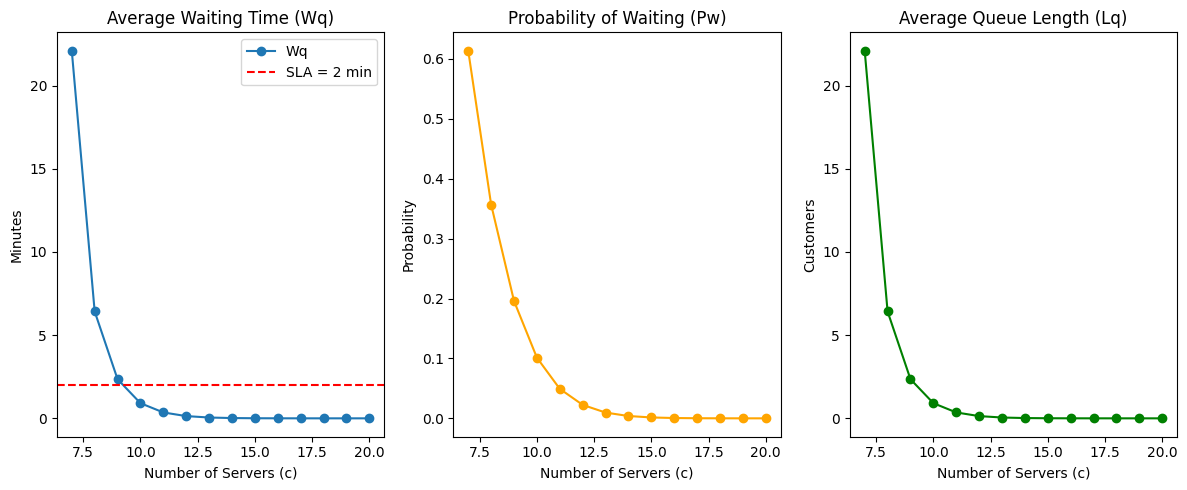

In [52]:
# Main execution
if __name__ == "__main__":
    lambda_rate = 60   # Customer arrival rate (customers/hour)
    mu = 10            # Customer service rate per server (customers/hour)
    c_range = range(1, 21)  # Number of servers to test
    sla_Wq = 2         # SLA: Average waiting time ≤ 2 minutes

    # Show summary table
    df_results = mmc_summary(lambda_rate, mu, c_range, sla_Wq)
    print(df_results)

    # Plot graphs
    plot_mmc(lambda_rate, mu, c_range, sla_Wq)

# Checking Optimal Point

In [ ]:
result = mmc(lambda_rate=60, mu=10, c=10)
if result:
    print("P0 =", result["P0"])
    print("P_wait =", result["P_wait"])
    print("Lq =", result["Lq"])
    print("Wq =", result["Wq"])
    print("W =", result["W"])
    print("L =", result["L"])
    print("ρ =", result["rho"])
else:
    print("System is unstable (ρ ≥ 1)")

P0 = 0.002431737650246648
P_wait = 0.10129924268741751
Lq = 0.9116931841867575
Wq = 0.015194886403112624
W = 0.11519488640311262
L = 6.911693184186757
ρ = 0.6
